# Assignment 1: Data Exploration and Classification

### prepare tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
warnings.filterwarnings('ignore')

In [3]:
the_habits = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(the_habits.shape)
the_habits.head(len(the_habits))

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df_num = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', usecols=['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'NObeyesdad'])

print(df_num)

            Age    Height      Weight  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000  1.0  2.000000  0.000000   
...         ...       ...         ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641  3.0  2.863513  1.026452   

               NObeyesdad  
0           Normal_Weight  
1           Normal_Weight  
2           Normal_Weight  
3      Overweight_Level_I  
4     Overweight_Level_II  
...                   ...  
2106     Ob

## Description

In [5]:
df_num.describe()

,Age,Height,Weight,NCP,CH2O,FAF
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.685628,2.008011,1.010298
std,6.345968,0.093305,26.191172,0.778039,0.612953,0.850592
min,14.000000,1.450000,39.000000,1.000000,1.000000,0.000000
25%,19.947192,1.630000,65.473343,2.658738,1.584812,0.124505
50%,22.777890,1.700499,83.000000,3.000000,2.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,2.477420,1.666678
max,61.000000,1.980000,173.000000,4.000000,3.000000,3.000000


In [5]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## encode

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['CAEC_encoded'] = label_encoder.fit_transform(df['CAEC'])
df['CALC_encoded'] = label_encoder.fit_transform(df['CALC'])
df['MTRANS_encoded'] = label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])

print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  ...  FAF  TUE        CALC                 MTRANS  \
0  3.0  Sometimes    no  ...  0.0  1.0          no  Public_Transportation   
1  3.0  Sometimes   yes  ...  3.0  0.0   Sometimes  Public_Transportation   
2  3.0  Sometimes    no  ...  2.0  1.0  Frequently  Public_Transportation   
3  3.0  Sometimes    no  ...  2.0  0.0  Frequently                Walking   
4  1.0  Sometimes    no  ...  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad gender_encoded CAEC_encoded  CALC_encoded  \
0     

In [8]:
df_encode = df.drop(['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad'], axis=1, inplace=True)

In [9]:
df_encoded = pd.get_dummies(df, columns=['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], drop_first=True)

print(df_encoded.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  gender_encoded  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0               0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0               0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0               1   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0               1   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0               1   

   CAEC_encoded  CALC_encoded  MTRANS_encoded  NObeyesdad_encoded  \
0             2             3               3                   1   
1             2             2               3                   1   
2             2             1               3                   1   
3             2             1               4                   5   
4             2             2               3                   6   

   family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  
0                                True     False      False    False  
1                       

In [14]:
print(df_encoded.shape)

(2111, 17)


## duplication

In [10]:
duplicates = df_encoded.duplicated()
print(df_encoded[duplicates])

df_encoded.drop_duplicates(inplace=True)
print(df_encoded.shape)

      Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  gender_encoded  \
98   21.0    1.52    42.0   3.0  1.0   1.0  0.0  0.0               0   
106  25.0    1.57    55.0   2.0  1.0   2.0  2.0  0.0               0   
174  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0               1   
179  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0               1   
184  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0               1   
209  22.0    1.69    65.0   2.0  3.0   2.0  1.0  1.0               0   
309  16.0    1.66    58.0   2.0  1.0   1.0  0.0  1.0               0   
460  18.0    1.62    55.0   2.0  3.0   1.0  1.0  1.0               0   
467  22.0    1.74    75.0   3.0  3.0   1.0  1.0  0.0               1   
496  18.0    1.72    53.0   2.0  3.0   2.0  0.0  2.0               1   
527  21.0    1.52    42.0   3.0  1.0   1.0  0.0  0.0               0   
659  21.0    1.52    42.0   3.0  1.0   1.0  0.0  0.0               0   
663  21.0    1.52    42.0   3.0  1.0   1.0  0.0  0.0            

## plots for all features

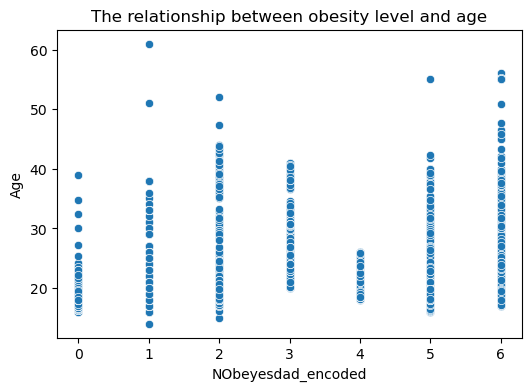

In [11]:
plt.figure(figsize=(6,4))
plt.title('The relationship between obesity level and age')
sns.scatterplot(y='Age',data=df_encoded,x='NObeyesdad_encoded')
plt.show()

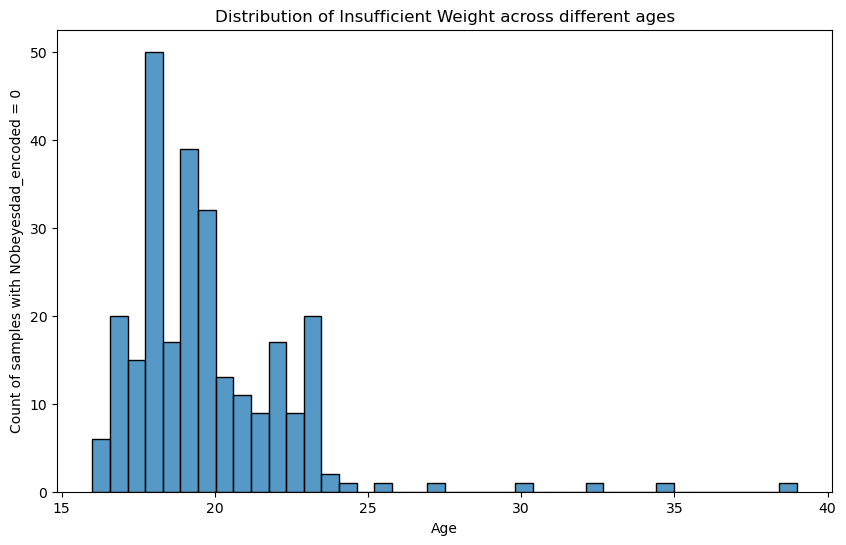

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Insufficient Weight across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 0], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 0')
plt.show()

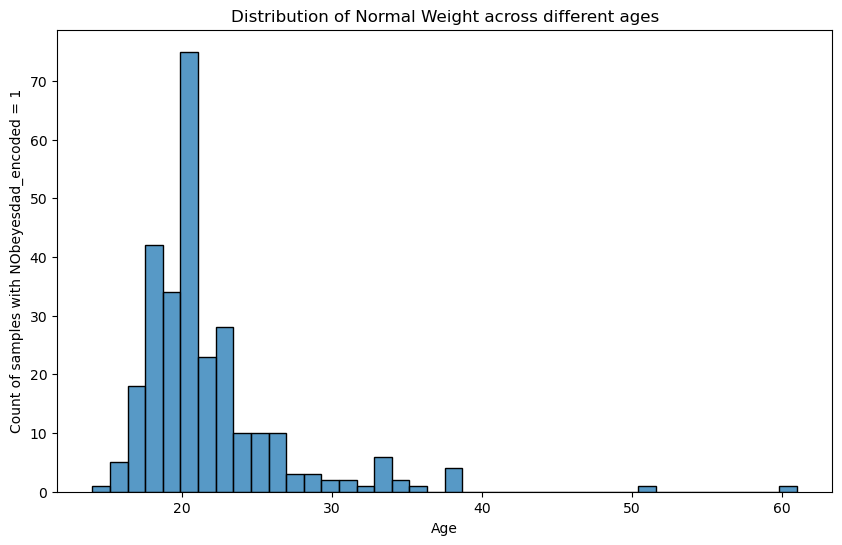

In [62]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Normal Weight across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 1], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 1')
plt.show()

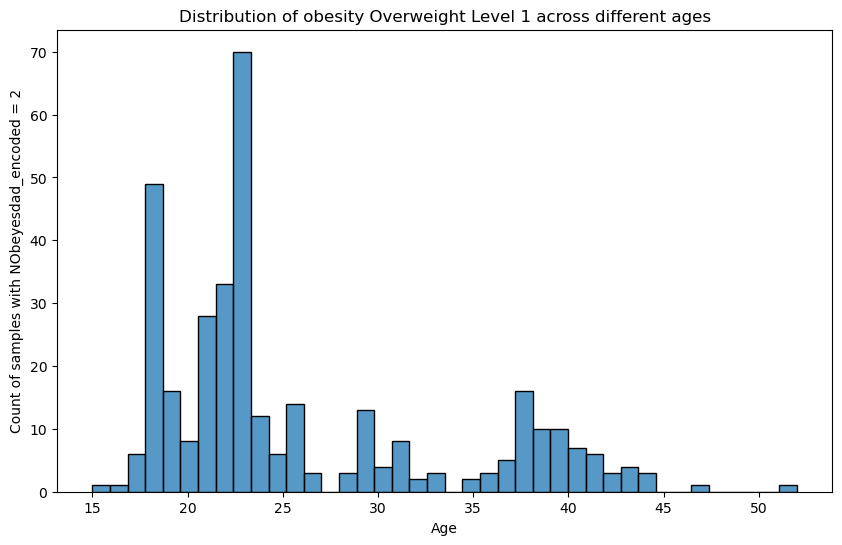

In [63]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of obesity Overweight Level 1 across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 2], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 2')
plt.show()

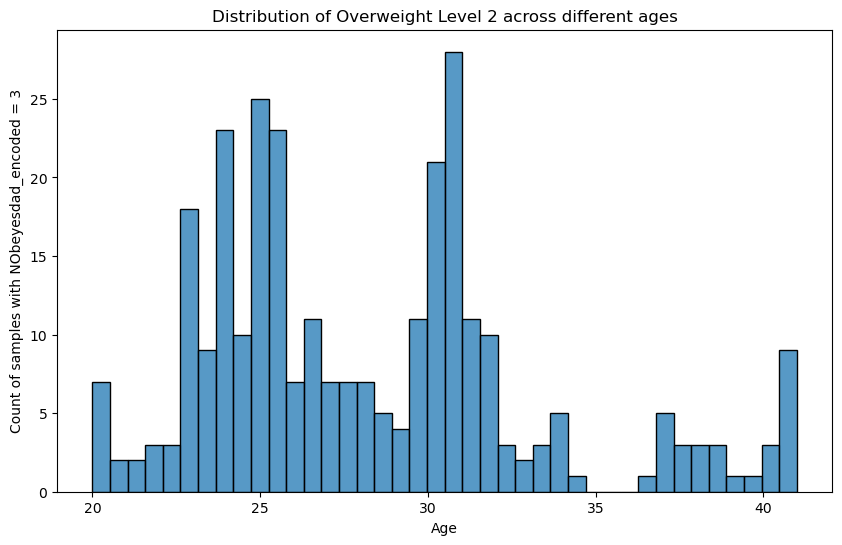

In [64]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Overweight Level 2 across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 3], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 3')
plt.show()

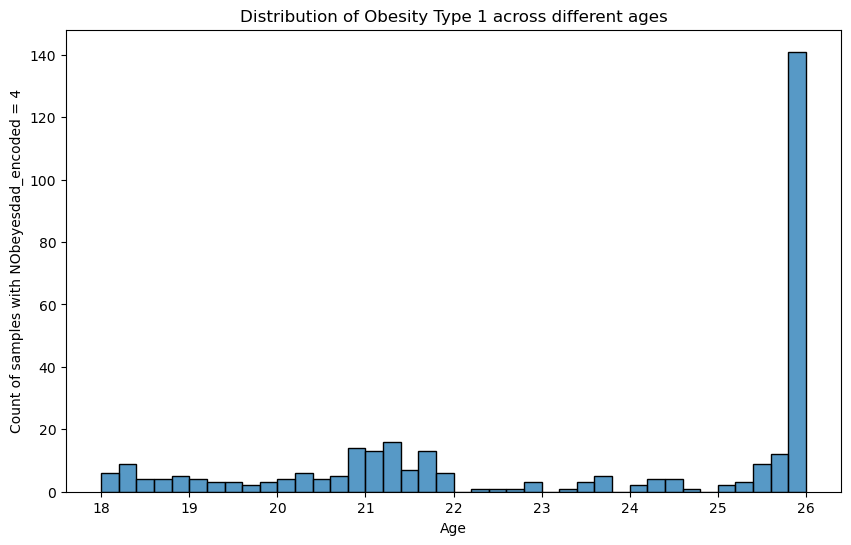

In [65]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Obesity Type 1 across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 4], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 4')
plt.show()

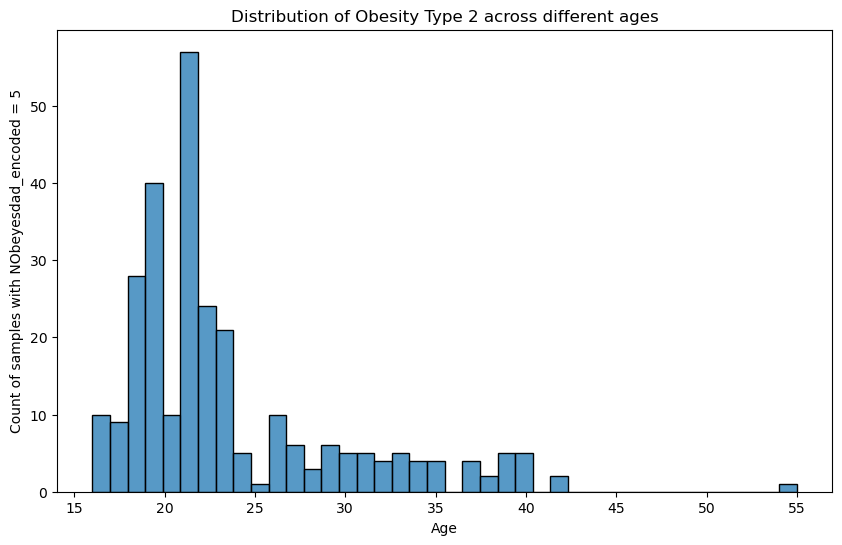

In [66]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Obesity Type 2 across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 5], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 5')
plt.show()

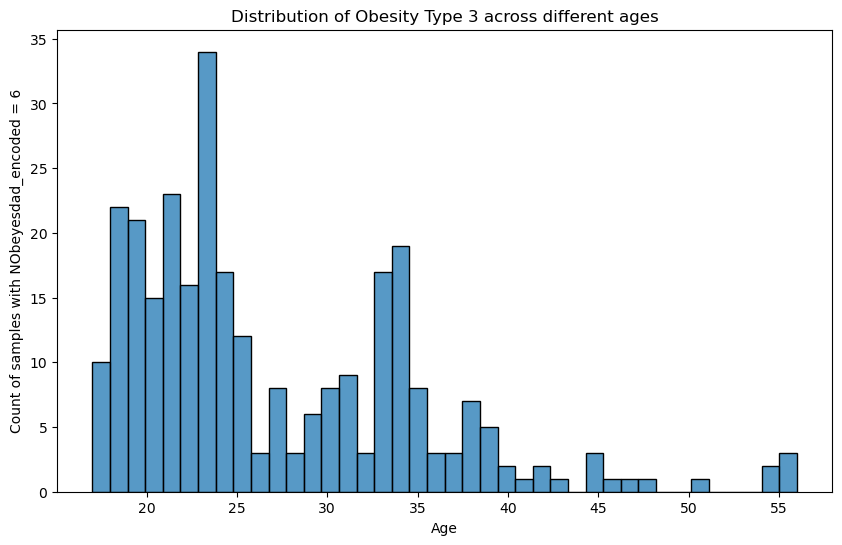

In [67]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Obesity Type 3 across different ages')
sns.histplot(data=df_encoded[df_encoded['NObeyesdad_encoded'] == 6], x='Age', bins=40, kde=False)
plt.xlabel('Age')
plt.ylabel('Count of samples with NObeyesdad_encoded = 6')
plt.show()

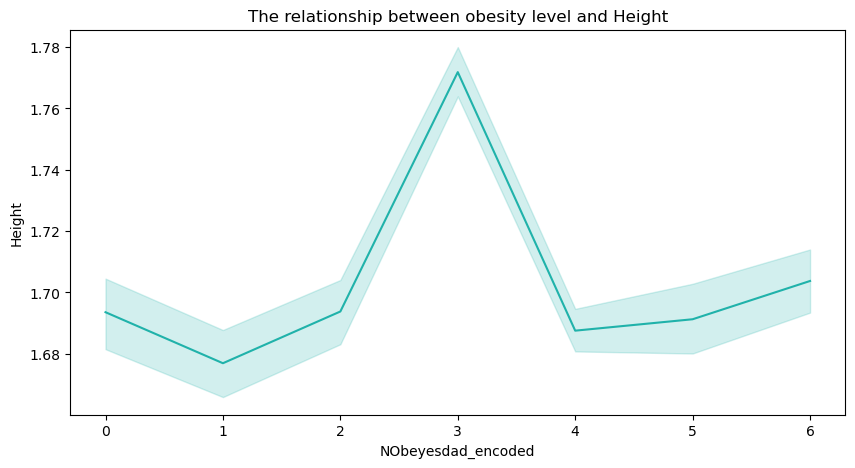

In [68]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and Height") 
sns.lineplot(data= df_encoded, x="NObeyesdad_encoded", y="Height", color="lightseagreen")
plt.show()

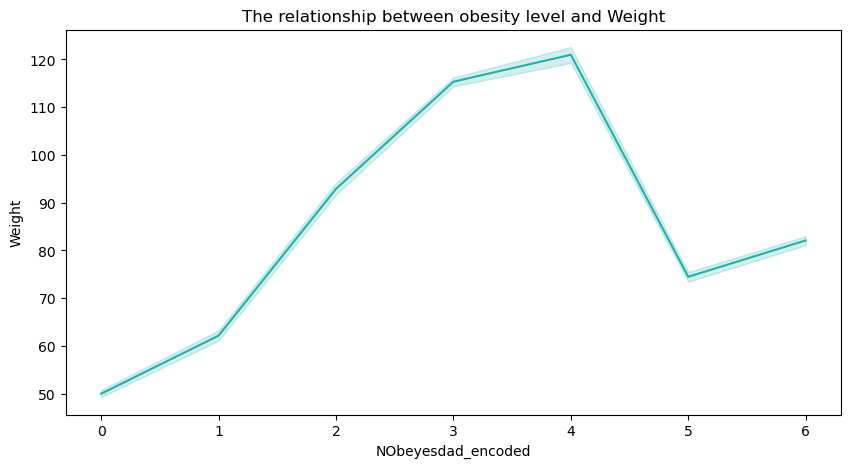

In [69]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and Weight") 
sns.lineplot(data= df_encoded, x="NObeyesdad_encoded", y="Weight", color="lightseagreen")
plt.show()

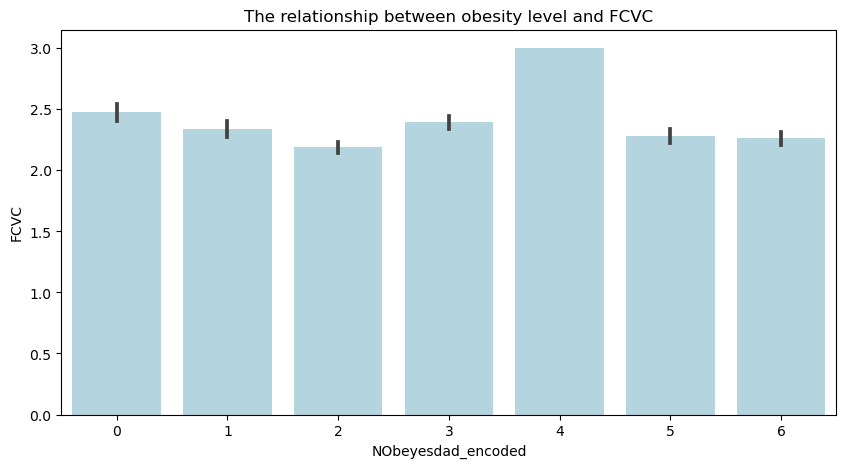

In [70]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and FCVC") 
sns.barplot(data= df_encoded, x="NObeyesdad_encoded", y="FCVC", color="lightblue")
plt.show()

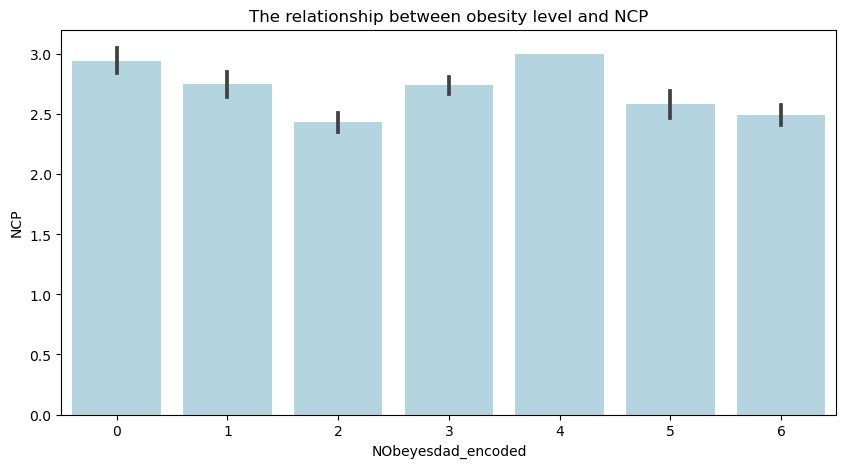

In [71]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and NCP") 
sns.barplot(data= df_encoded, x="NObeyesdad_encoded", y="NCP", color="lightblue")
plt.show()

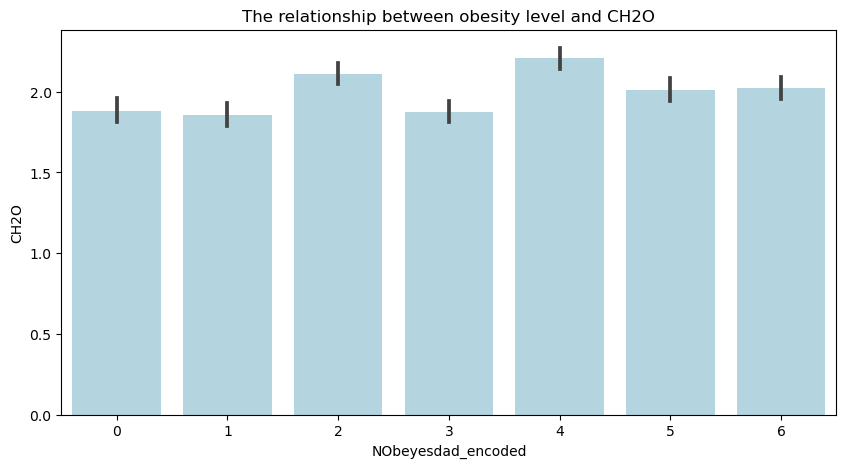

In [72]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and CH2O") 
sns.barplot(data= df_encoded, x="NObeyesdad_encoded", y="CH2O", color="lightblue")
plt.show()

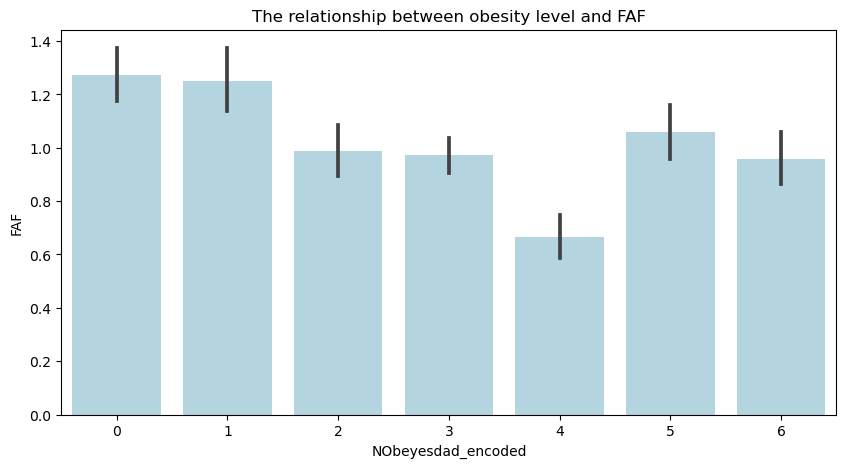

In [73]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and FAF") 
sns.barplot(data= df_encoded, x="NObeyesdad_encoded", y="FAF", color="lightblue")
plt.show()

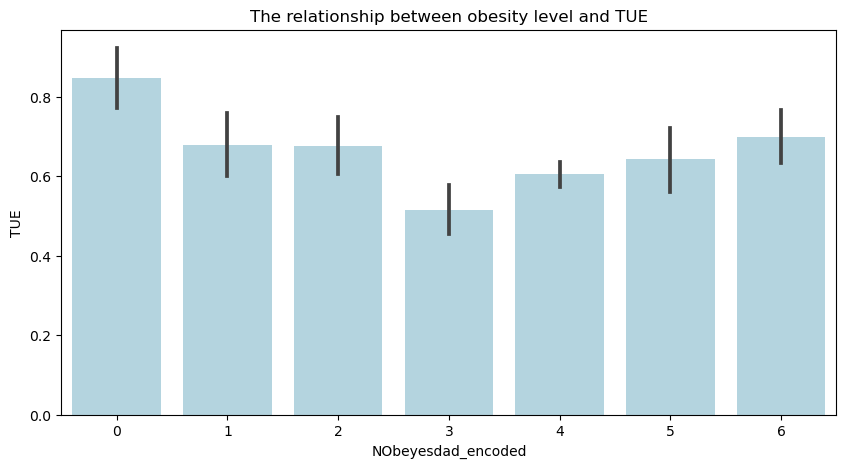

In [74]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and TUE") 
sns.barplot(data= df_encoded, x="NObeyesdad_encoded", y="TUE", color="lightblue")
plt.show()

In [78]:
cross_tab = pd.crosstab(df_encoded['gender_encoded'], df_encoded['NObeyesdad_encoded'])
print(cross_tab)

NObeyesdad_encoded    0    1    2    3    4    5    6
gender_encoded                                       
0                   169  137  156    2  323  145  103
1                    98  145  195  295    1  131  187


In [84]:
cross_tab = pd.crosstab(df_encoded['FAVC_yes'], df_encoded['NObeyesdad_encoded'])
print(cross_tab)

count_values = df_encoded['FAVC_yes'].value_counts()
print(count_values)

NObeyesdad_encoded    0    1    2    3    4    5    6
FAVC_yes                                             
False                50   78   11    7    1   22   74
True                217  204  340  290  323  254  216
FAVC_yes
True     1844
False     243
Name: count, dtype: int64


In [12]:
cross_tab = pd.crosstab(df_encoded['family_history_with_overweight_yes'], df_encoded['NObeyesdad_encoded'])
print(cross_tab)

count_values = df_encoded['family_history_with_overweight_yes'].value_counts()
print(count_values)

NObeyesdad_encoded                    0    1    2    3    4    5    6
family_history_with_overweight_yes                                   
False                               142  130    7    1    0   67   18
True                                125  152  344  296  324  209  272
family_history_with_overweight_yes
True     1722
False     365
Name: count, dtype: int64


In [13]:
cross_tab = pd.crosstab(df_encoded['SCC_yes'], df_encoded['NObeyesdad_encoded'])
print(cross_tab)
count_values = df_encoded['SCC_yes'].value_counts()
print(count_values)

NObeyesdad_encoded    0    1    2    3    4    5    6
SCC_yes                                              
False               245  252  349  296  324  239  286
True                 22   30    2    1    0   37    4
SCC_yes
False    1991
True       96
Name: count, dtype: int64


In [88]:
cross_tab = pd.crosstab(df_encoded['SMOKE_yes'], df_encoded['NObeyesdad_encoded'])
print(cross_tab)

NObeyesdad_encoded    0    1    2    3    4    5    6
SMOKE_yes                                            
False               266  269  345  282  323  273  285
True                  1   13    6   15    1    3    5


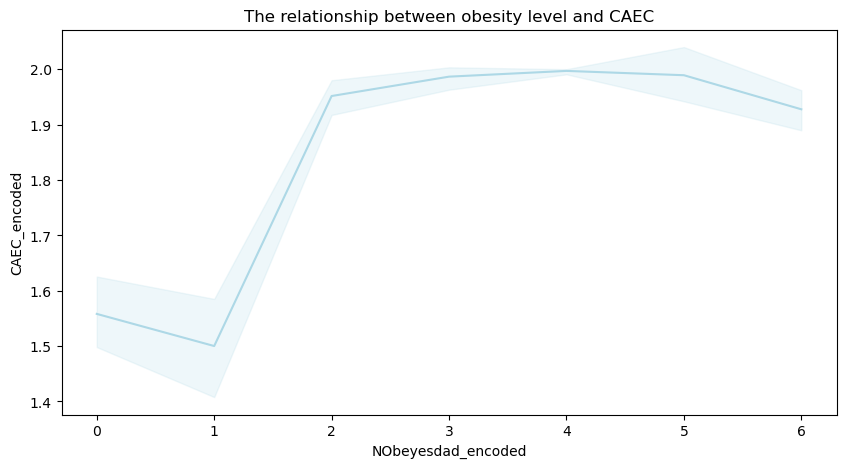

In [90]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and CAEC") 
sns.lineplot(data= df_encoded, x="NObeyesdad_encoded", y="CAEC_encoded", color="lightblue")
plt.show()

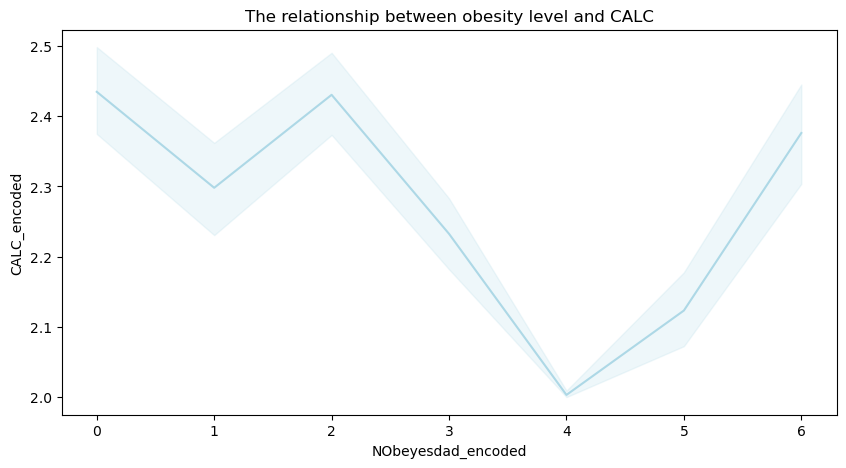

In [89]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and CALC") 
sns.lineplot(data= df_encoded, x="NObeyesdad_encoded", y="CALC_encoded", color="lightblue")
plt.show()

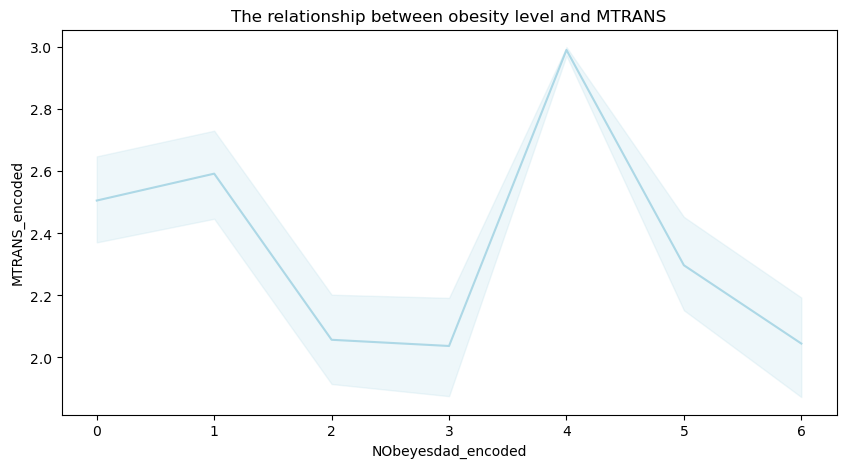

In [91]:
plt.figure(figsize=(10,5)) 
plt.title("The relationship between obesity level and MTRANS") 
sns.lineplot(data= df_encoded, x="NObeyesdad_encoded", y="MTRANS_encoded", color="lightblue")
plt.show()

### finding outlier

In [12]:
z_scores = (df_encoded - df_encoded.mean()) / df_encoded.std()
print(z_scores)

           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.526487 -0.887195 -0.872775 -0.788175  0.390812 -0.007808 -1.186692   
1    -0.526487 -1.960318 -1.178226  1.081904  0.390812  1.636160  2.328350   
2    -0.212456  1.044427 -0.376419 -0.788175  0.390812 -0.007808  1.156669   
3     0.415606  1.044427  0.005394  1.081904  0.390812 -0.007808  1.156669   
4    -0.369471  0.829802  0.112301 -0.788175 -2.224885 -0.007808 -1.186692   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.530123  0.086449  1.700968  1.081904  0.390812 -0.454739  0.777360   
2107 -0.372150  0.492670  1.790099  1.081904  0.390812  0.000626  0.384989   
2108 -0.287190  0.531538  1.788053  1.081904  0.390812  0.081284  0.470309   
2109  0.001389  0.394650  1.774968  1.081904  0.390812  1.393410  0.147978   
2110 -0.108086  0.388062  1.779779  1.081904  0.390812  1.411780  0.015982   

           TUE  gender_encoded  CAEC_encoded  CALC_encoded  MTR

In [13]:
threshold = 3
outliers = np.abs(z_scores) > threshold
print(df_encoded[outliers.any(axis=1)])

            Age    Height      Weight      FCVC  NCP      CH2O       FAF  \
1     21.000000  1.520000   56.000000  3.000000  3.0  3.000000  3.000000   
11    21.000000  1.720000   80.000000  2.000000  3.0  2.000000  2.000000   
15    22.000000  1.700000   66.000000  3.000000  3.0  2.000000  2.000000   
18    30.000000  1.710000   82.000000  3.000000  4.0  1.000000  0.000000   
21    52.000000  1.690000   87.000000  3.000000  1.0  2.000000  0.000000   
...         ...       ...         ...       ...  ...       ...       ...   
1676  30.684347  1.915000  129.966428  2.108638  3.0  1.014876  0.987521   
1727  31.205668  1.877732  127.161381  2.731368  3.0  1.486824  1.485978   
1728  30.899219  1.909639  129.013178  2.222590  3.0  1.591909  1.392026   
1763  31.199261  1.848845  125.077863  2.496190  3.0  1.662117  0.992371   
1764  31.190219  1.842812  125.973927  2.151335  3.0  1.491169  0.883542   

           TUE  gender_encoded  CAEC_encoded  CALC_encoded  MTRANS_encoded  \
1     0.0

## preprare data

In [15]:
x = df_encoded[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'gender_encoded', 'CAEC_encoded', 'CALC_encoded', 'MTRANS_encoded', 'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes']]
y = df_encoded['NObeyesdad_encoded']

cols_to_convert = ['gender_encoded', 'CAEC_encoded', 'CALC_encoded', 'MTRANS_encoded']
x.loc[:, cols_to_convert] = x.loc[:, cols_to_convert].astype('category')

encoder = ce.OrdinalEncoder()

x_enc = encoder.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_enc, y, test_size=0.3, random_state=42)

print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1460, 16)
Shape of X_test: (627, 16)
Shape of y_train: (1460,)
Shape of y_test: (627,)


## Decision tree:

Number of tree nodes:  185


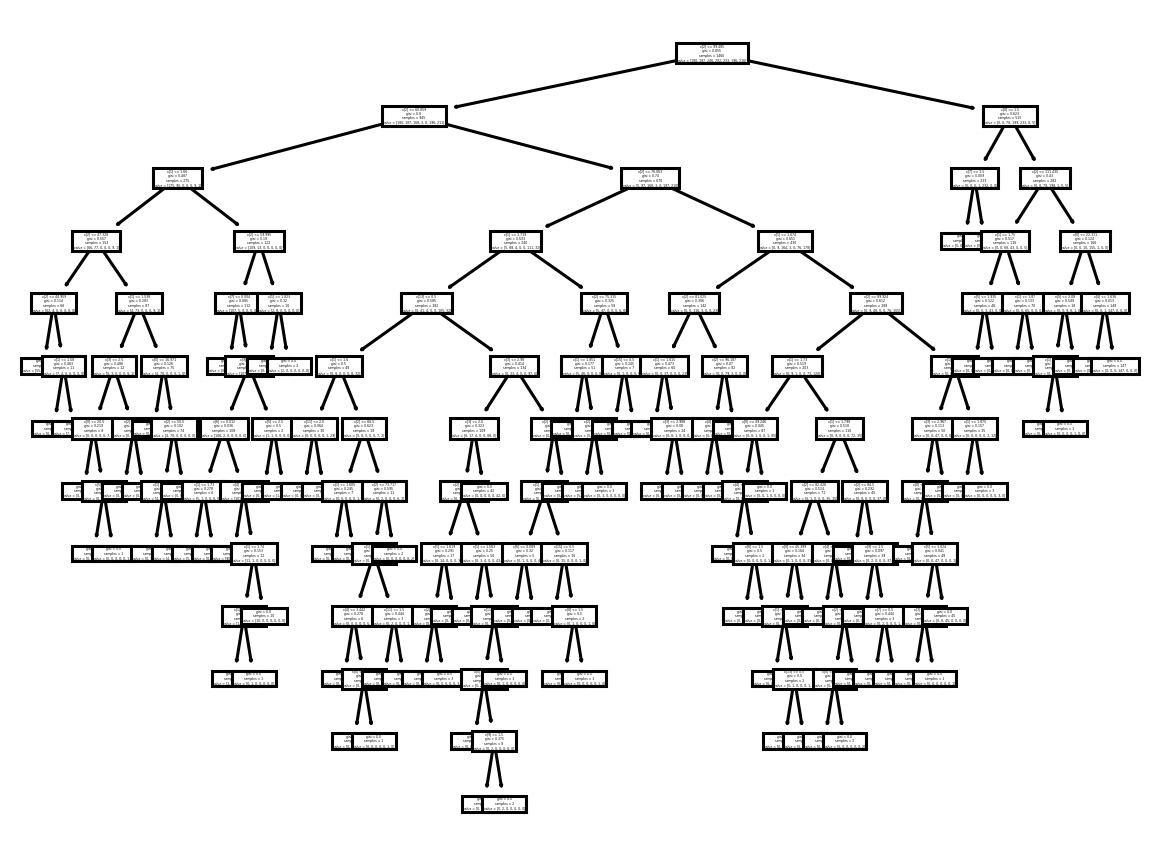

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=47)
#Train Decision Tree Classifier
tdt=dt.fit(x_train,y_train)
print('Number of tree nodes: ', tdt.tree_.node_count) # Print out the result
#Plot Initial Decision Tree
plt.figure(dpi=220)
tree.plot_tree(tdt)
plt.show() #show the tree 

### 10 fold cross-validation

max_depth=1 Average 10-Fold CV Score:0.3041095890410959 Node count:3
max_depth=2 Average 10-Fold CV Score:0.5554794520547945 Node count:7
max_depth=3 Average 10-Fold CV Score:0.6184931506849314 Node count:15
max_depth=4 Average 10-Fold CV Score:0.773972602739726 Node count:27
max_depth=5 Average 10-Fold CV Score:0.826027397260274 Node count:51
max_depth=6 Average 10-Fold CV Score:0.8945205479452054 Node count:77
max_depth=7 Average 10-Fold CV Score:0.8897260273972603 Node count:109
max_depth=8 Average 10-Fold CV Score:0.9082191780821918 Node count:133
max_depth=9 Average 10-Fold CV Score:0.923972602739726 Node count:155


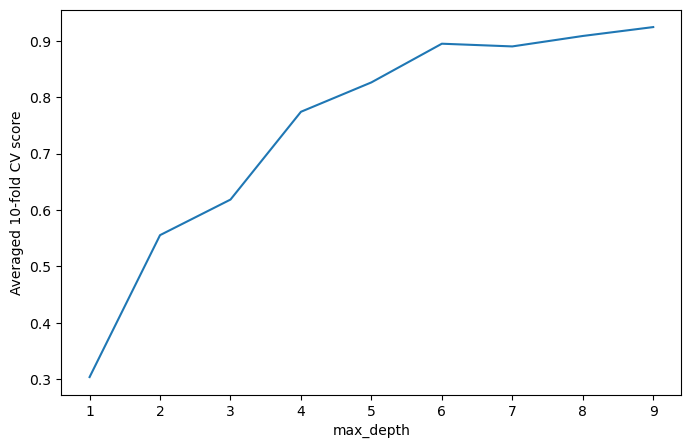

In [16]:
cv = cross_val_score(dt, x_train, y_train, cv=10)

# Tune 'max_depth' parameter.
maxdepth_cv = []
node_counts = []

for k in range(1, 10, 1):
    dt = DecisionTreeClassifier(max_depth=k, random_state=47)
    dt.fit(x_train, y_train)
    predict = dt.predict(x_test)
    cv = cross_val_score(dt, x_train, y_train, cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)

# Plot averaged CV scores for all max_depth tunings
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
axes.set_xticks(range(1, 10, 1))
k = range(1, 10, 1)
plt.plot(k, maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

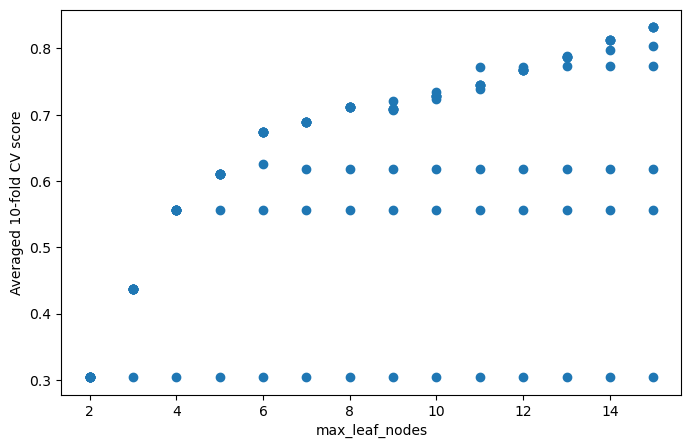

In [17]:
cv = cross_val_score(dt, x_train, y_train, cv=10)

# Tune 'max_depth' and 'max_leaf_nodes' parameters.
maxdepth_cv = []
maxleaf_cv = []

for k in range(1, 10, 1):
    for leaf_nodes in range(2, 16, 1): 
        dt = DecisionTreeClassifier(max_depth=k, max_leaf_nodes=leaf_nodes, random_state=47)
        dt.fit(x_train, y_train)
        cv = cross_val_score(dt, x_train, y_train, cv=10)
        maxdepth_cv.append(np.mean(cv))
        maxleaf_cv.append(leaf_nodes)

# Plot averaged CV scores for all max_depth and max_leaf_nodes tunings
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
plt.scatter(maxleaf_cv, maxdepth_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

## create the final model:

### choose max depth as 6

Number of tree nodes after optimizing max depth:  77


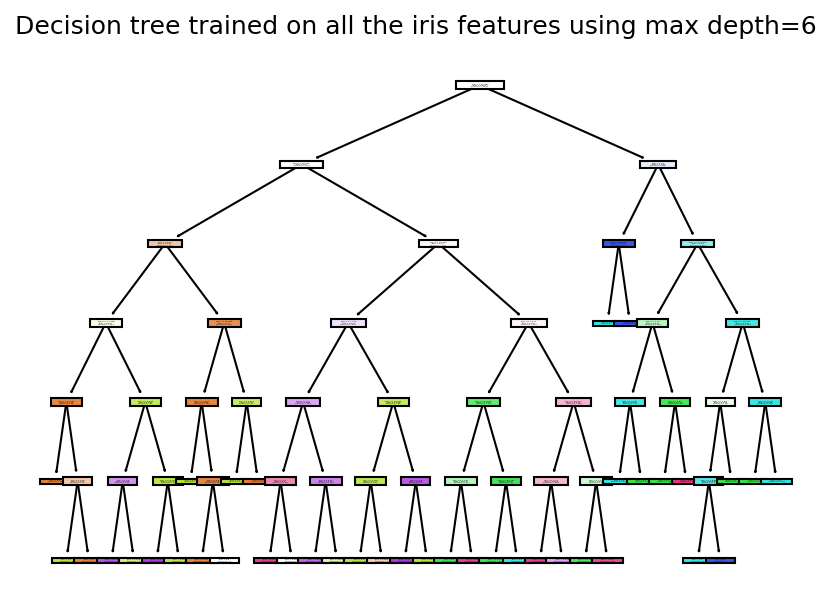

Accuracy score of our model with Decision Tree: 0.88
Precision score of our model with Decision Tree : 0.88
Recall score of our model with Decision Tree : 0.88


In [36]:
dt_opt = DecisionTreeClassifier(max_depth=6,random_state=47)
dt_opt_fit=dt_opt.fit(x_train,y_train)
predict_opt=dt_opt.predict(x_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result

plt.figure(dpi=150)
tree.plot_tree(dt_opt_fit,filled=True)
plt.title("Decision tree trained on all the iris features using max depth=6")
plt.show() #show the tree

acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)

### Tring other numbers of max depth then find 8

Number of tree nodes after optimizing max depth:  133


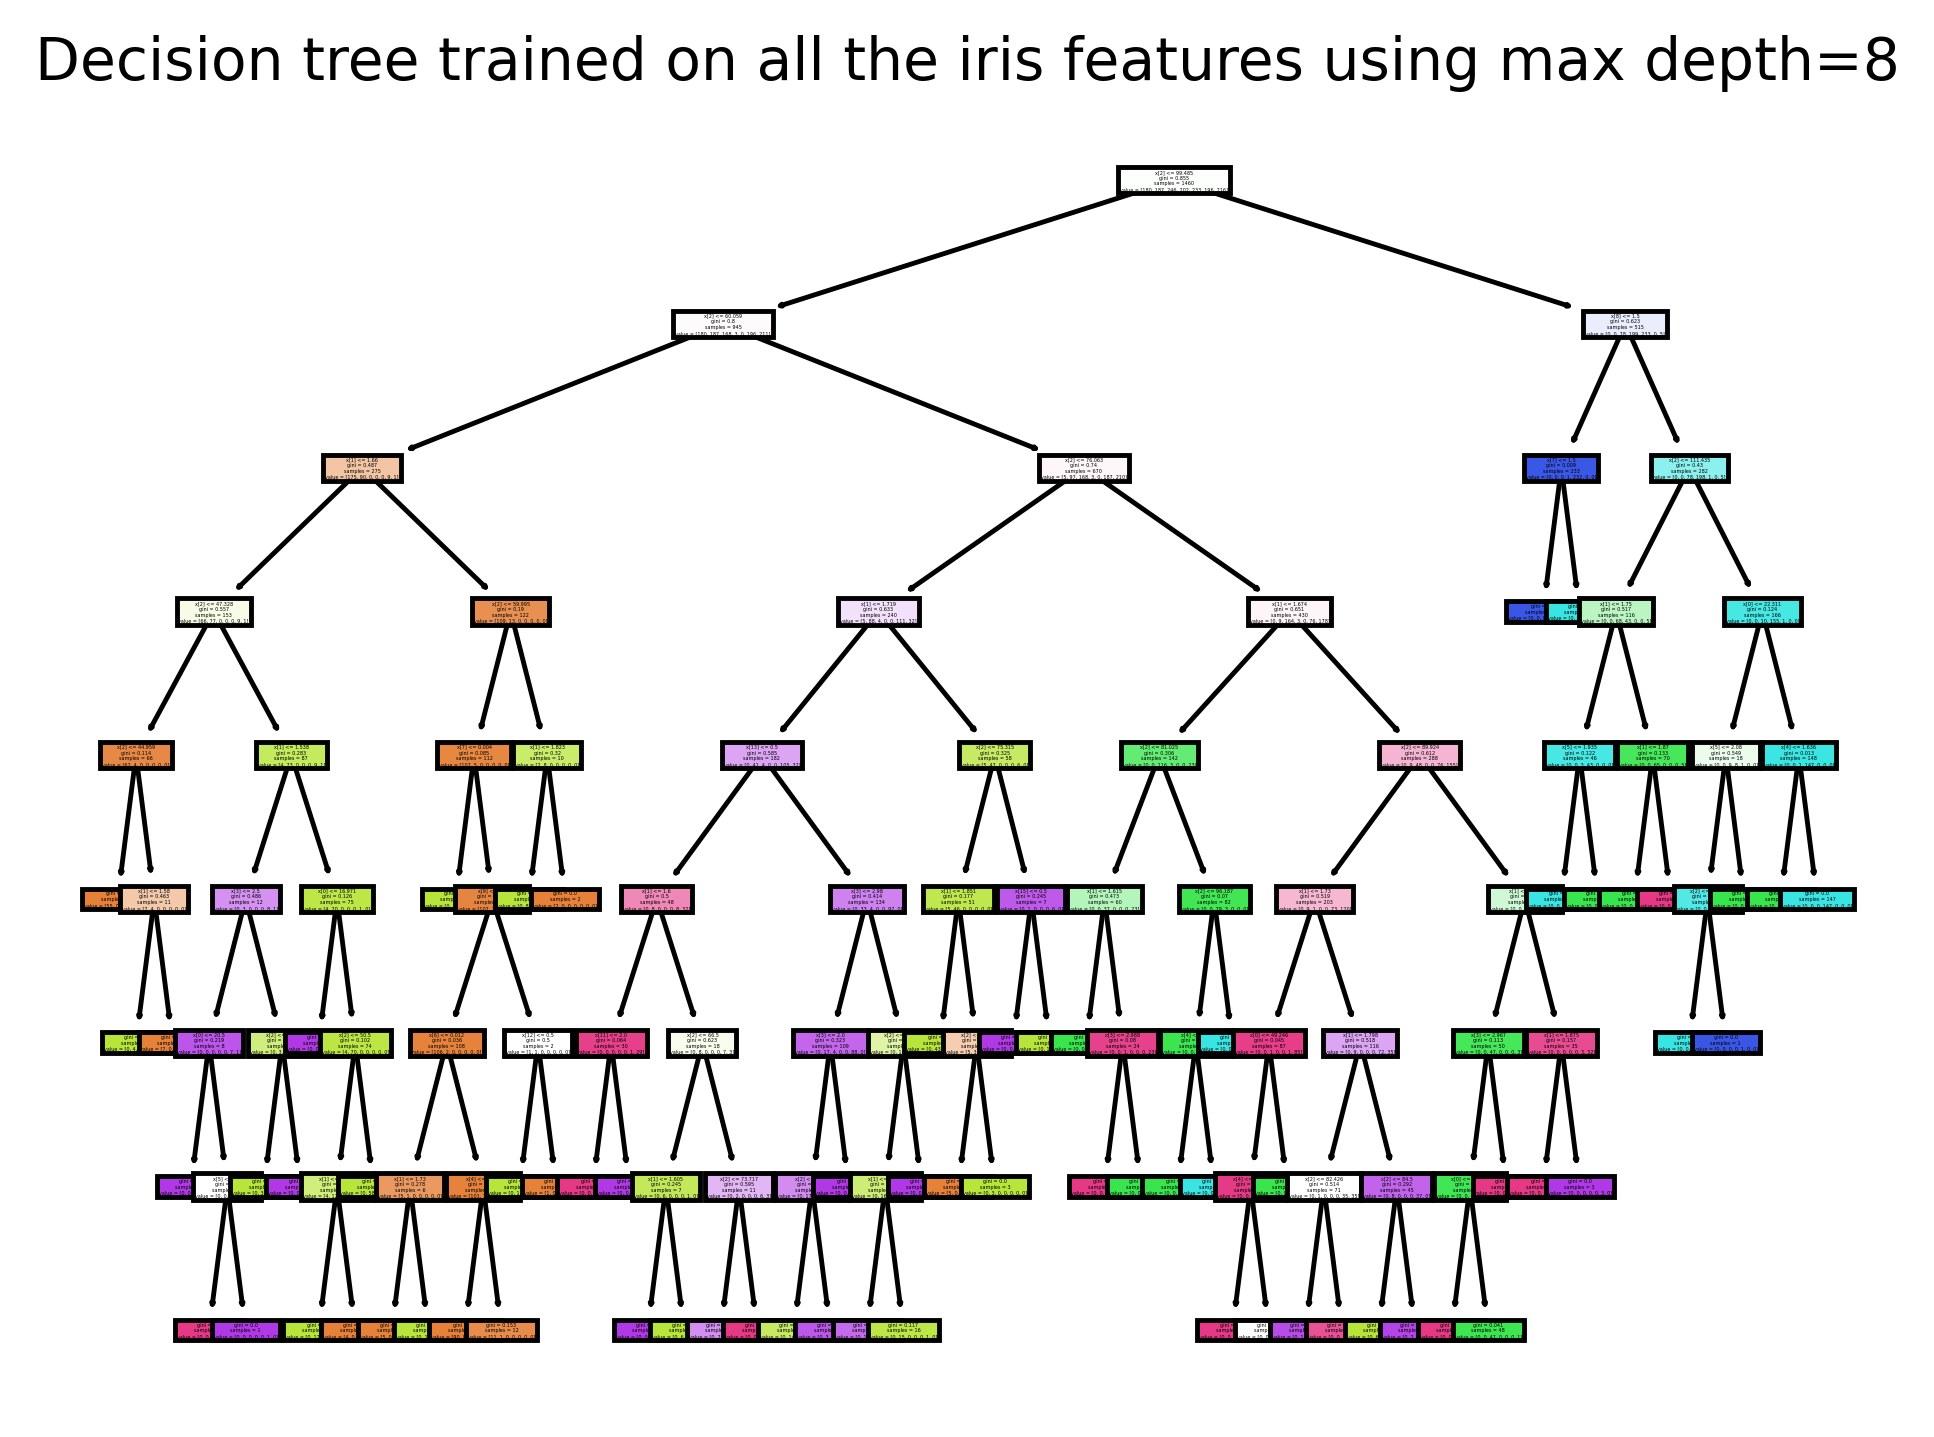

Accuracy score of our model with Decision Tree: 0.93
Precision score of our model with Decision Tree : 0.93
Recall score of our model with Decision Tree : 0.93


In [21]:
dt_opt = DecisionTreeClassifier(max_depth=8,random_state=47)
dt_opt_fit=dt_opt.fit(x_train,y_train)
predict_opt=dt_opt.predict(x_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result

plt.figure(dpi=350)
tree.plot_tree(dt_opt_fit,filled=True)
plt.title("Decision tree trained on all the iris features using max depth=8")
plt.show() #show the tree

acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)

## Trying different parameter numbers to find out the best one

Number of tree nodes after optimizing max depth:  29


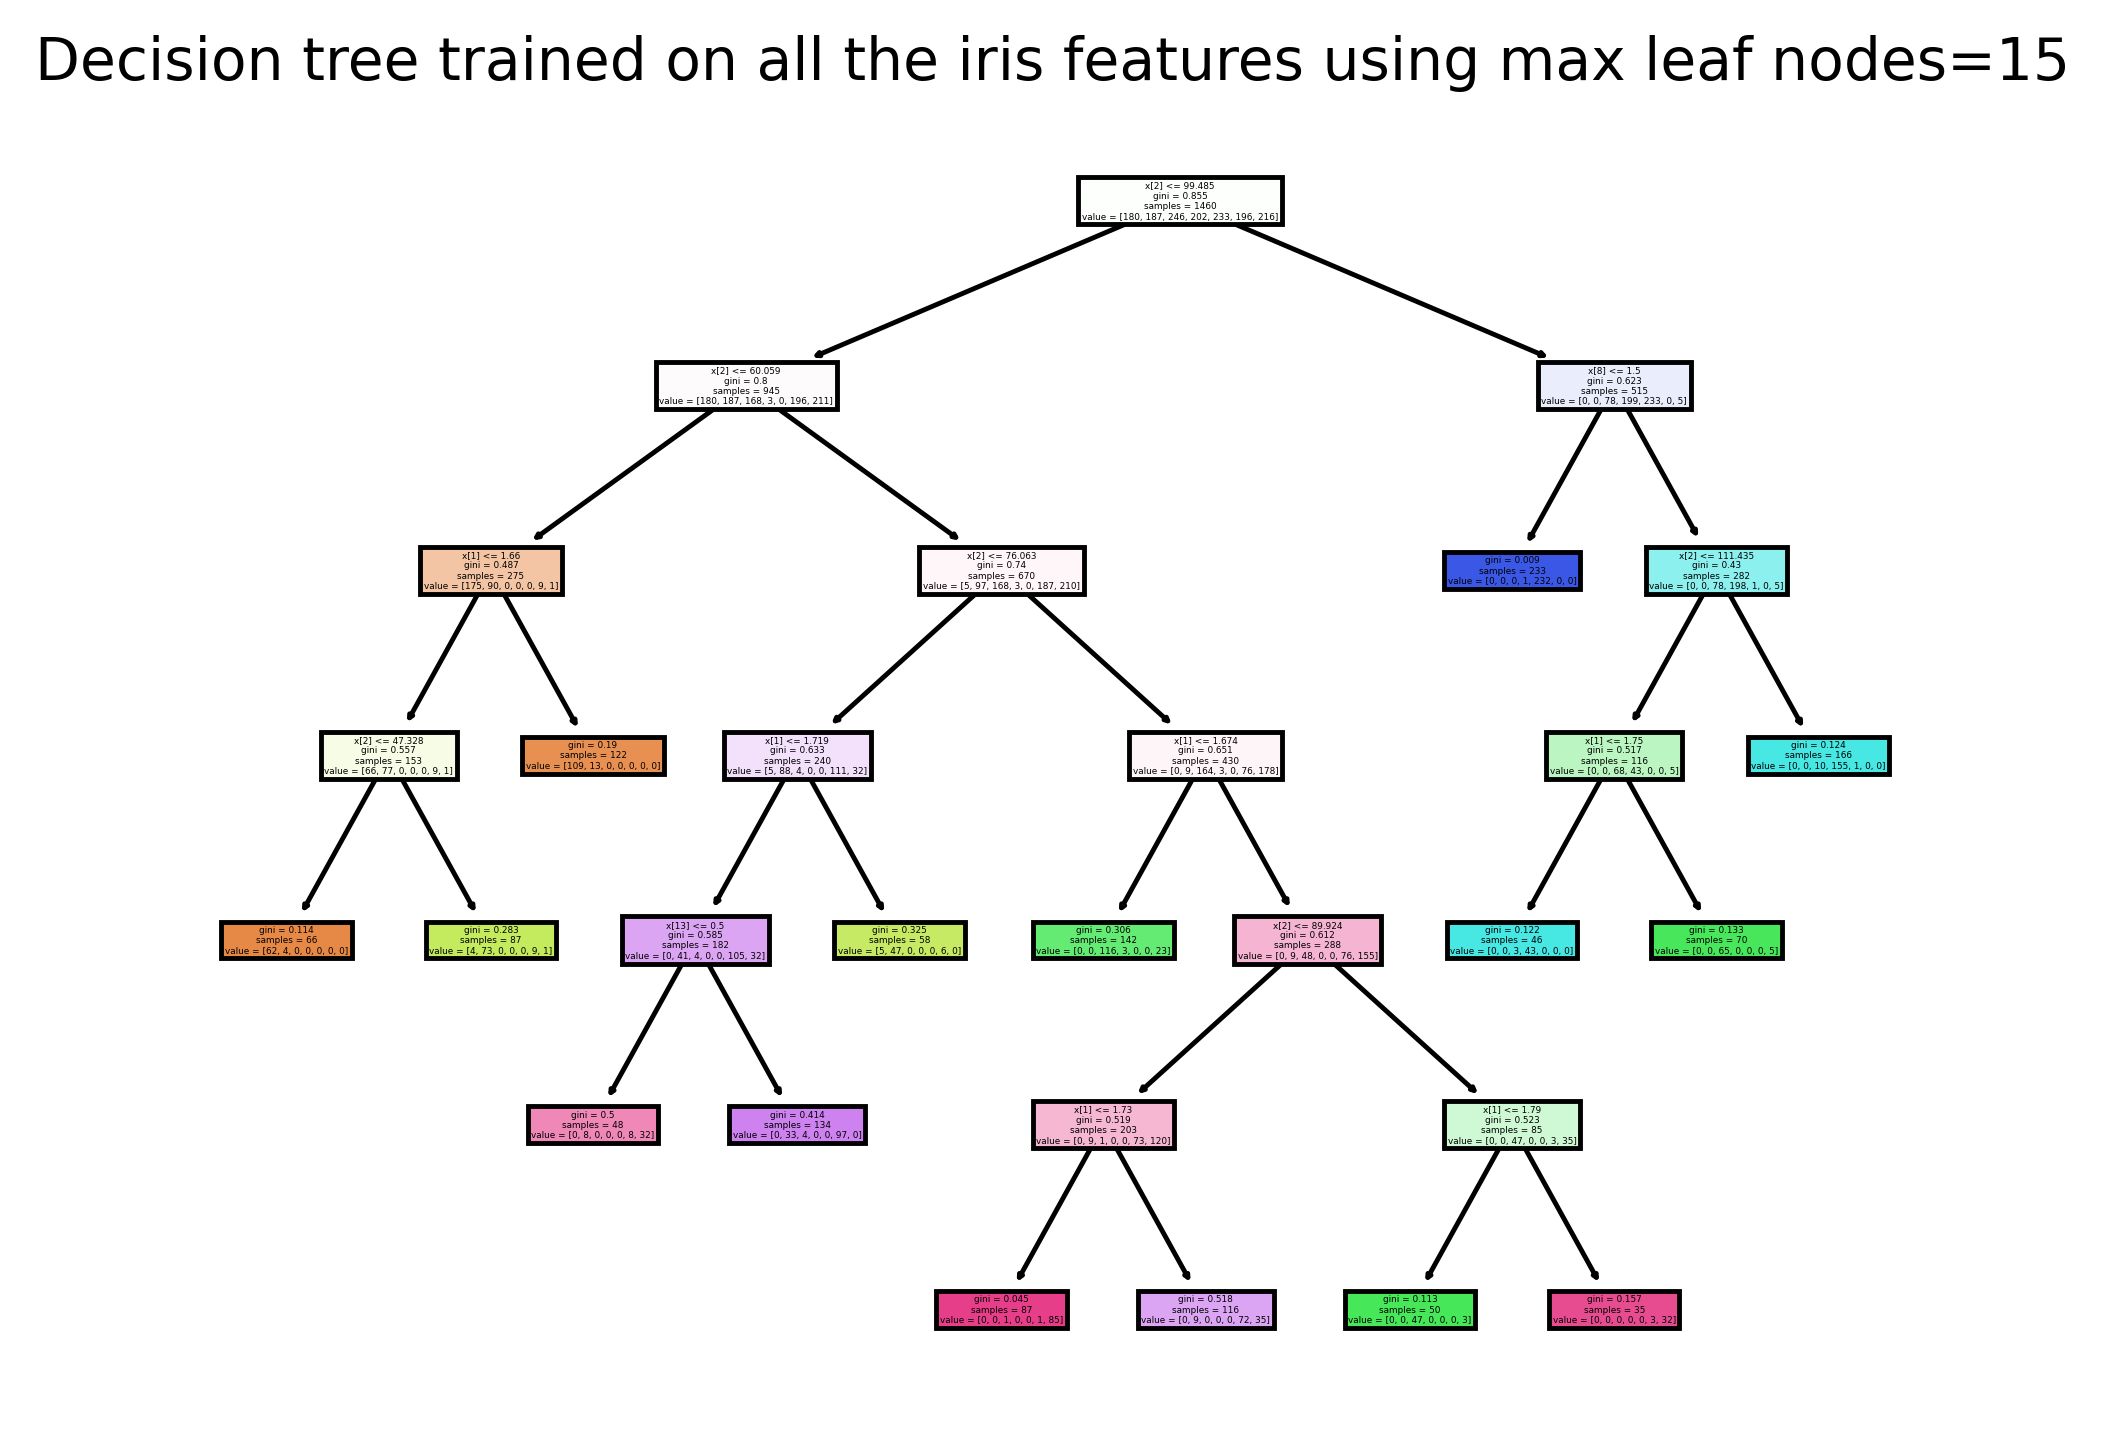

Accuracy score of our model with Decision Tree: 0.85
Precision score of our model with Decision Tree : 0.85
Recall score of our model with Decision Tree : 0.85


In [31]:
dt_opt = DecisionTreeClassifier(max_leaf_nodes=15, random_state=47)
dt_opt_fit = dt_opt.fit(x_train, y_train)
predict_opt = dt_opt.predict(x_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count)

plt.figure(dpi=350)
tree.plot_tree(dt_opt_fit, filled=True)
plt.title("Decision tree trained on all the iris features using max leaf nodes=15")
plt.show()

acc_score = accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f' % acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f' % precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f' % recall)

Number of tree nodes after optimizing max depth:  29


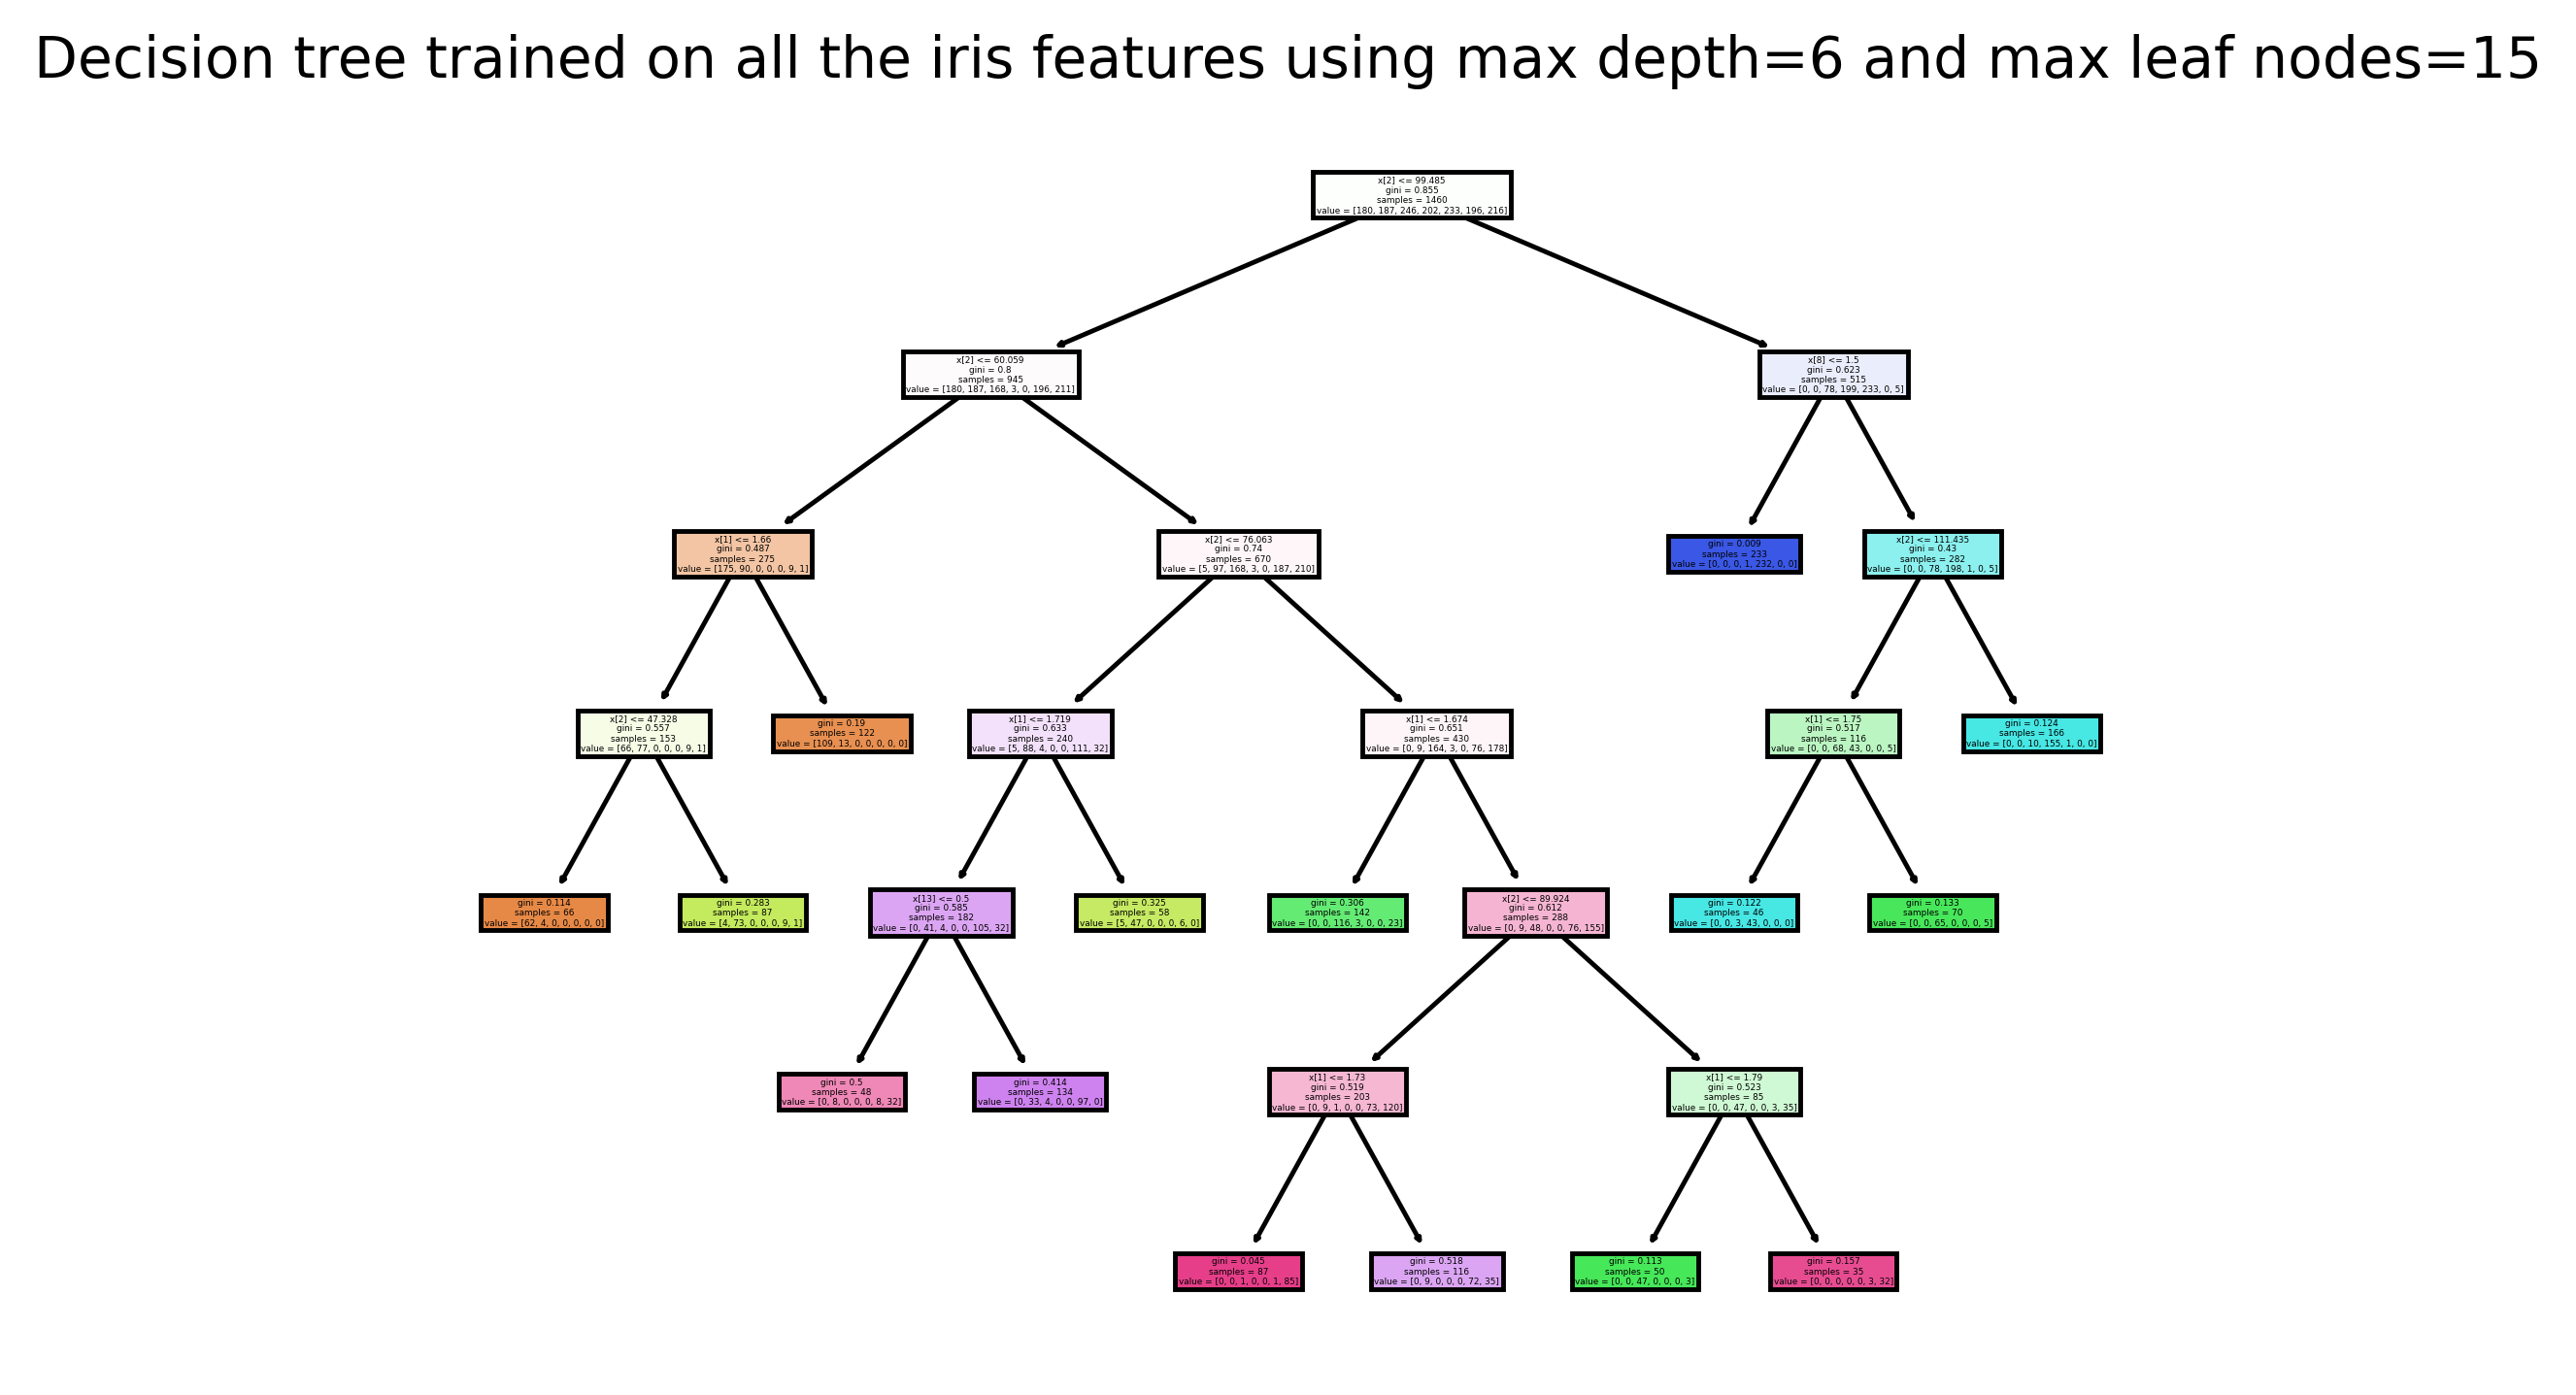

Accuracy score of our model with Decision Tree: 0.85
Precision score of our model with Decision Tree : 0.85
Recall score of our model with Decision Tree : 0.85


In [17]:
dt_opt = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, random_state=47)
dt_opt_fit = dt_opt.fit(x_train, y_train)
predict_opt = dt_opt.predict(x_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count)

plt.figure(dpi=350)
tree.plot_tree(dt_opt_fit, filled=True)
plt.title("Decision tree trained on all the iris features using max depth=6 and max leaf nodes=15")
plt.show()

acc_score = accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f' % acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f' % precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f' % recall)

max_depth=8 showing better by itself, but when max_leaf_nodes=15 the accuracy are as same as 6. choose 6, because Ockham's Razor

found max depth 6, max leaf nodes 15 are the best

### print our hot matrix using the found best parameters

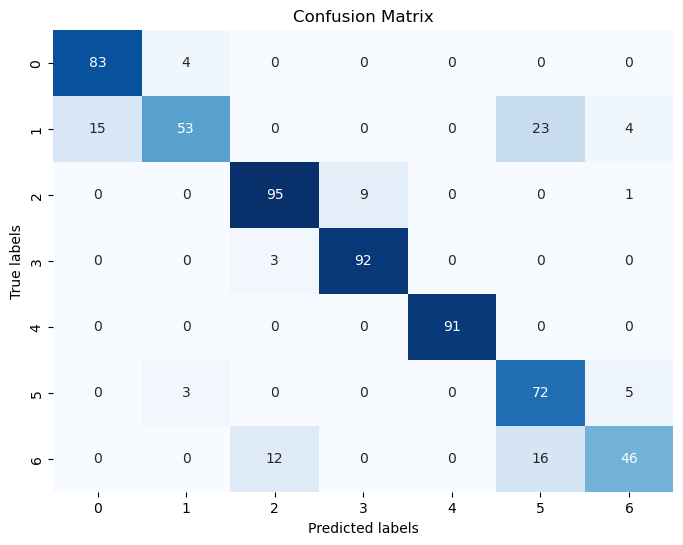

In [36]:
conf_matrix = confusion_matrix(y_test, predict_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Importance

In [18]:
importances = pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(dt_opt.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances

,Feature,Importance
2,Weight,0.514
1,Height,0.247
8,gender_encoded,0.210
13,FAVC_yes,0.029
0,Age,0.000
3,FCVC,0.000
4,NCP,0.000
5,CH2O,0.000
6,FAF,0.000
7,TUE,0.000
